# WORKSHOP 3
## Carlos Eduardo Ortega Clement A01707480
### 16/08/2023

### 3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?

In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy import stats
import math


In [5]:

sprices = yf.download(['AMD','INTC'],start="2017-01-01", end="2022-08-15",interval="1mo")
sprices=sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()

[*********************100%***********************]  2 of 2 completed


In [6]:
sr.describe()

,AMD,INTC
count,67.000000,67.000000
mean,0.031376,0.000003
std,0.162913,0.076738
min,-0.528462,-0.225947
25%,-0.073509,-0.038060
50%,0.024554,0.004040
75%,0.156193,0.051577
max,0.386468,0.177803


In [7]:
# Stating the hypotheses: 
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.426008051219686

In [8]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.15718167262541005

In [9]:
 # Using the ttest_ind function from stats:
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.426008051219686, pvalue=0.15718167262541005)

In [10]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

AttributeError: 'Series' object has no attribute 'append'

### 4 MEASURES OF LINEAR RELATIONSHIP

In [11]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


<Figure size 640x480 with 0 Axes>

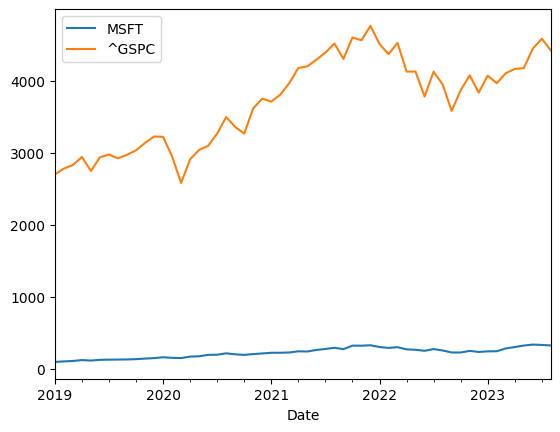

In [12]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [13]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 640x480 with 0 Axes>

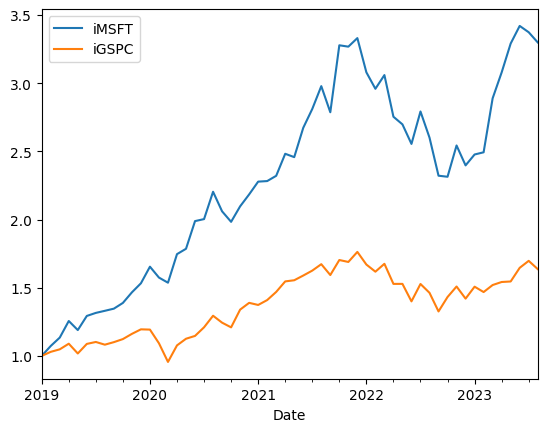

In [14]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [15]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [16]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


<Figure size 640x480 with 0 Axes>

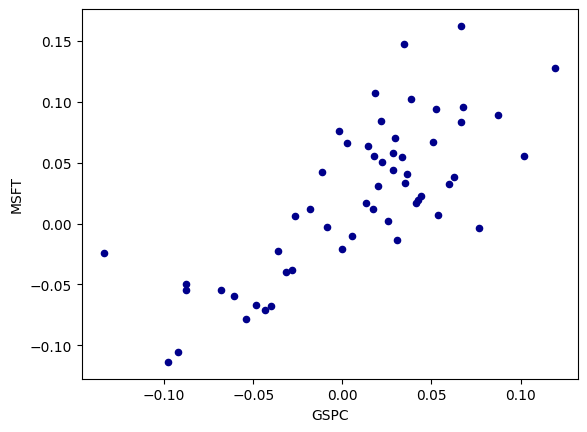

In [17]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

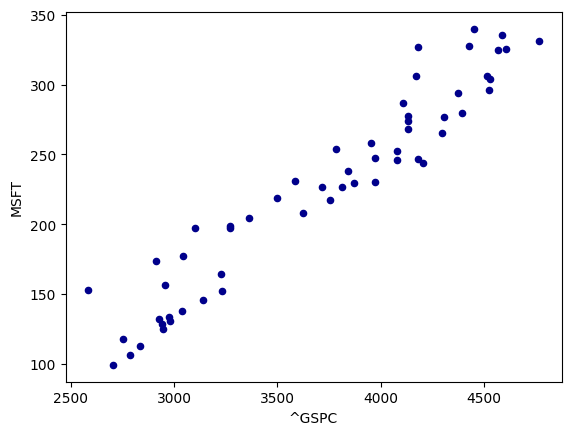

In [18]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

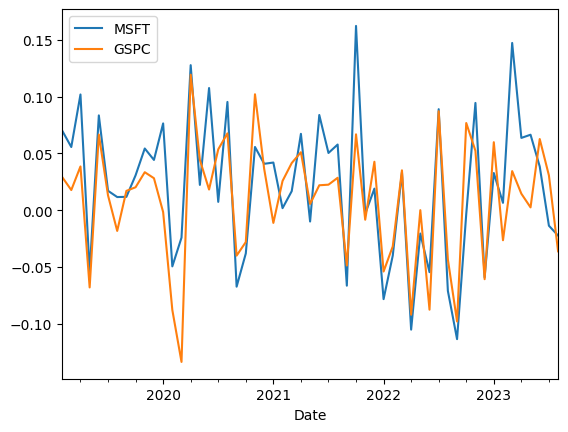

In [19]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

### 4.3 Calculating covariance and correlation

In [20]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.0025617881633594724

In [21]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00392587, 0.00256179],
       [0.00256179, 0.00286193]])

In [22]:
cov = covm[0,1]
cov

0.0025617881633594724

In [23]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.76426879],
       [0.76426879, 1.        ]])

In [24]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7642687921112441

In [25]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

PearsonRResult(statistic=0.7642687921112444, pvalue=1.1273756863461583e-11)

#### The pvalue is almost zero () . MSFT and GSPC returns have a positive and very significant correlation (at the 99.9999…% confidence level).